In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bidi import algorithm as bidialg
from matplotlib.ticker import FuncFormatter

In [2]:
data = pd.read_csv('ans.csv')
data

,חותמת זמן,גיל,מין,האם את/ה בן/בת העדה האתיופית?,האם יש לך חבר/ה ממוצא אתיופי?,האם את/ה לומד/ת עם אנשים ממוצא אתיופי?,האם יש לך שכנים ממוצא אתיופי?,יחס המשטרה כלפי בני העדה האתיופית הוא אלים.,המשטרה נוהגת באופן שווה כלפי כל האזרחים.,יחסה של המשטרה כלפי בני העדה האתיופית פוגע בזכותם להליך משפטי הוגן.,מחאה והפגנה צריכות להיות במסגרת החוק.,שילוב אתיופים במקומות עבודה שונים בארץ יוביל להפחתת הגזענות כלפיהם.,מחאת העדה האתיופית ברחובות תוביל לשינוי היחס כלפיה.,היחס לעדה ישתנה עם שילוב אתיופים בתפקידים שונים במוסדות המדינה.,"סדנאות והשתלמויות חינוך בקרב עובדני מדינה ומשטרה, ישפיעו לטובה על היחס כלפי העדה האתיופית."
0,20/03/2020 13:36:06,17-21,נקבה,לא,לא,כן,לא,5,1,5,4,5,5,5,1
1,20/03/2020 13:36:43,17-21,זכר,לא,כן,כן,לא,5,1,5,5,5,3,5,4
2,20/03/2020 13:36:54,17-21,זכר,לא,כן,כן,לא,5,1,5,4,5,5,5,5
3,20/03/2020 13:37:15,17-21,נקבה,לא,לא,לא,לא,5,1,4,4,4,2,4,3
4,20/03/2020 13:38:28,17-21,זכר,לא,לא,כן,לא,3,3,1,5,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,20/03/2020 17:54:06,17-21,זכר,לא,לא,לא,לא,1,5,1,1,1,1,1,1
81,21/03/2020 09:49:26,17-21,נקבה,לא,לא,כן,לא,5,1,4,5,3,3,4,4
82,21/03/2020 10:18:16,35+,נקבה,כן,כן,כן,לא,5,1,5,5,5,3,5,4
83,21/03/2020 12:13:10,21-35,זכר,לא,לא,לא,לא,3,2,3,5,4,3,3,4


In [3]:
first = list(data['האם יש לך חבר/ה ממוצא אתיופי?'])
second = list(data['האם יש לך שכנים ממוצא אתיופי?'])
third = list(data['האם את/ה לומד/ת עם אנשים ממוצא אתיופי?'])
index_yes = []
index_no = []

for i in enumerate(first):
    if i[1] == 'כן':
        index_yes.append(i[0])
    else:
        if second[i[0]] == 'כן':
            index_yes.append(i[0])
            continue
        else:
            if third[i[0]] == 'כן':
                index_yes.append(i[0])
                continue
            else:
                index_no.append(i[0])
print(len(index_yes),len(index_no))

43 42


In [4]:
def precentage_calc(num, sum):
    return float(num) / float(sum) *100

In [50]:
def draw_graph_1(title, data, color):

    fig, ax = plt.subplots(figsize=(6.8, 4.8))
    index = np.arange(5)
    bar_width = 0.35
    opacity = 0.8

    rect1_label = bidialg.get_display(u'חברים של אתיופים')
    rects1 = plt.bar(index, data, bar_width,
    alpha=opacity,
    color=f'{color}',
    label=rect1_label)

    ylabel_text = bidialg.get_display(u'כמות תשובות')
    plt.ylabel(ylabel_text)
    title = bidialg.get_display(u'{}'.format(title))
    plt.title(title)
    plt.xticks(index, (1, 2, 3, 4, 5))
    plt.legend()

    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
                '%d' % int(height) + "%", ha='center', va='bottom')

    formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
    ax.yaxis.set_major_formatter(formatter)

    plt.tight_layout()
    plt.show()
    plt.clf()

def draw_graph_2(title, data_1, color_1, data_2, color_2):
    fig, ax = plt.subplots(figsize=(6.8, 4.8))
    index = np.arange(5)
    bar_width = 0.35
    opacity = 0.8

    rect1_label = bidialg.get_display(u'באינטראקציה יומיומית')
    rects1 = plt.bar(index, data_1, bar_width,
    alpha=opacity,
    color=f'{color_1}',
    label=rect1_label)

    rect2_label = bidialg.get_display(u'אינם באינטראקציה יומיומית')
    rects2 = plt.bar(index + bar_width, data_2, bar_width,
    alpha=opacity,
    color=f'{color_2}',
    label=rect2_label)

    ylabel_text = bidialg.get_display(u'אחוז התשובות מהקבוצה')
    plt.ylabel(ylabel_text)
    title = bidialg.get_display(u'{}'.format(title))
    plt.title(title)
    plt.xticks(index + bar_width /2, (1, 2, 3, 4, 5))
    plt.legend()

    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
                '%d' % int(height) + "%", ha='center', va='bottom')
    for rect in rects2:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
                '%d' % int(height) + "%", ha='center', va='bottom')
    
    formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
    ax.yaxis.set_major_formatter(formatter)

    plt.tight_layout()
    plt.show()
    plt.clf()




In [51]:
def generate_data(col_name):
    friend_ranks = [0,0,0,0,0]
    not_friend_ranks = [0,0,0,0,0]

    for i in enumerate(list(data[col_name])):
        if i[0] in index_no:
            not_friend_ranks[i[1]-1] += 1
        else:
            friend_ranks[i[1]-1] += 1
    return [np.array(friend_ranks),np.array(not_friend_ranks)]
def generate_precentage_data(ls):
    ls1 = [precentage_calc(x, ls[0].sum()) for x in ls[0]]
    ls2 = [precentage_calc(x, ls[1].sum()) for x in ls[1]]
    nls1 = [round(x) for x in ls1]
    nls2 = [round(x) for x in ls2]
    return[nls1, nls2]


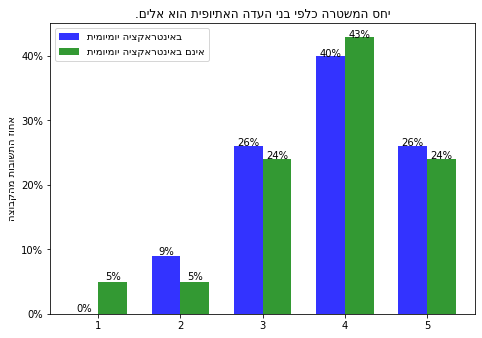

<Figure size 432x288 with 0 Axes>

In [52]:
col = 'יחס המשטרה כלפי בני העדה האתיופית הוא אלים.'

graph_data = generate_data(col)
graph_data = generate_precentage_data(graph_data)
draw_graph_2(col, graph_data[0], 'b', graph_data[1], 'g')




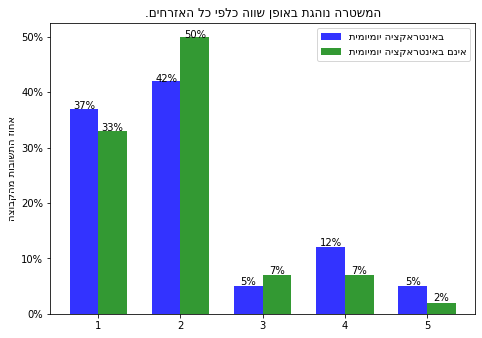

<Figure size 432x288 with 0 Axes>

In [53]:
col = 'המשטרה נוהגת באופן שווה כלפי כל האזרחים.'

graph_data = generate_data(col)
graph_data = generate_precentage_data(graph_data)
draw_graph_2(col, graph_data[0], 'b', graph_data[1], 'g')




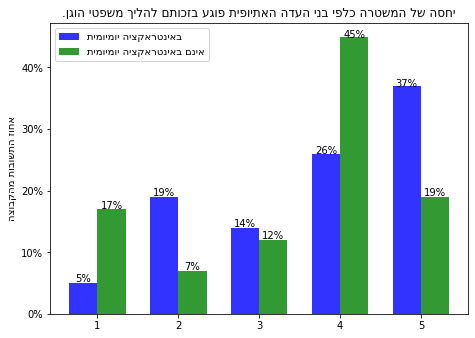

<Figure size 432x288 with 0 Axes>

In [54]:
col = 'יחסה של המשטרה כלפי בני העדה האתיופית פוגע בזכותם להליך משפטי הוגן.'

graph_data = generate_data(col)
graph_data = generate_precentage_data(graph_data)
draw_graph_2(col, graph_data[0], 'b', graph_data[1], 'g')




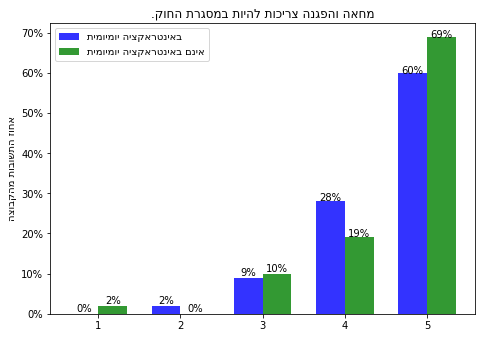

<Figure size 432x288 with 0 Axes>

In [55]:
col = 'מחאה והפגנה צריכות להיות במסגרת החוק.'

graph_data = generate_data(col)
graph_data = generate_precentage_data(graph_data)
draw_graph_2(col, graph_data[0], 'b', graph_data[1], 'g')




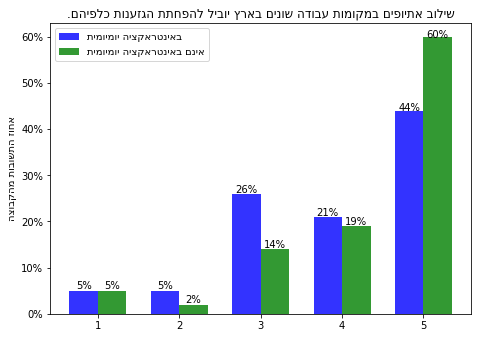

<Figure size 432x288 with 0 Axes>

In [56]:
col = 'שילוב אתיופים במקומות עבודה שונים בארץ יוביל להפחתת הגזענות כלפיהם.'

graph_data = generate_data(col)
graph_data = generate_precentage_data(graph_data)
draw_graph_2(col, graph_data[0], 'b', graph_data[1], 'g')




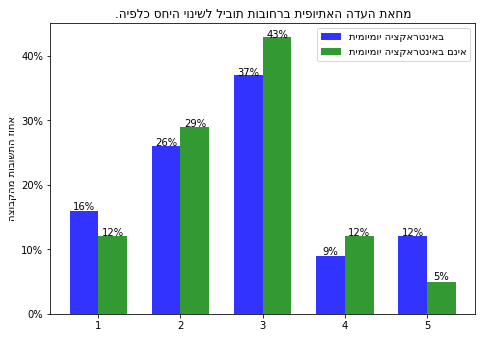

<Figure size 432x288 with 0 Axes>

In [57]:
col = 'מחאת העדה האתיופית ברחובות תוביל לשינוי היחס כלפיה.'

graph_data = generate_data(col)
graph_data = generate_precentage_data(graph_data)
draw_graph_2(col, graph_data[0], 'b', graph_data[1], 'g')




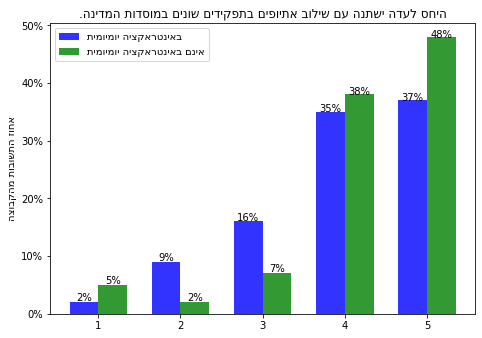

<Figure size 432x288 with 0 Axes>

In [58]:
col = 'היחס לעדה ישתנה עם שילוב אתיופים בתפקידים שונים במוסדות המדינה.'

graph_data = generate_data(col)
graph_data = generate_precentage_data(graph_data)
draw_graph_2(col, graph_data[0], 'b', graph_data[1], 'g')




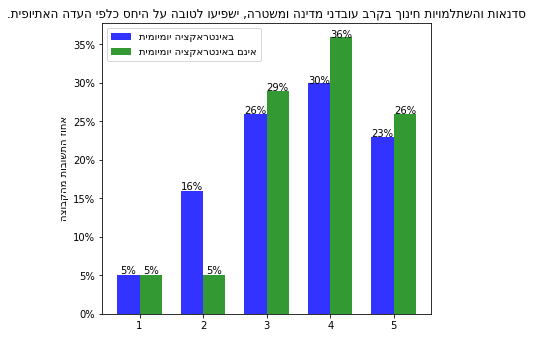

<Figure size 432x288 with 0 Axes>

In [59]:
col = 'סדנאות והשתלמויות חינוך בקרב עובדני מדינה ומשטרה, ישפיעו לטובה על היחס כלפי העדה האתיופית.'

graph_data = generate_data(col)
graph_data = generate_precentage_data(graph_data)
draw_graph_2(col, graph_data[0], 'b', graph_data[1], 'g')


